# MasterChessMind - Project Intro
What are some of the most significate dates in the history of computer science?

This notebook was created by Ofir Dubi and Yuval Krinsky as part of the Data Science workshop at the Open University of Israel, Spring of 2024.

## Chess in the advancements of Artificial Intelligence
Throughout history, chess was always considered an indicator of wisdom and who was good at it, was regarded as a smart and intelligent man. 
These days, chess is one of the world's most popular board games, played and admired for its strategic depth and intellectual challenge.

Chess players have dedicated years and decades in improving their strategies and tactics in the game. 
And as chess was considered a test of intellectual superiority, it's no surprise computer scientists took on the challenge of developing a computer program which will be able to play and defeat the best of the best human players.

Therefore, when in 1997, the **Deep Blue super computer defeated the current world champion and the chess legend Garry Kasparov**, it was and still is, considered a major milestone in the development of the field of AI in computer science.
The news of the defeat spread like fire in the whole world, and Deep Blue is even the subject of a few movies and books.
It's important to mention that the task of building Deep Blue was sure not a piece of cake, and the computer giant IBM had a big group of engineers working on it's development more than 10 years!

![AI Timeline](res/AI_timeline.png)

## Personal Connection
Both of us are a bit of chess fans, and doesn't miss the chance to play against a friend or a family member.
From firsthand experiences, we withstand the complexity of the game and the high skills needed to be a good player.
Therefore we thought of this as a great example to show the power of AI and specifically ML.

## Project Goal
The project goal is to provide a smart AI assistant based on machine learning for chess games. Currently, we don't have a real use of it in the world, but it's a very good demonstration of the advancements we can use AI and ML for.

The project is divided into 2 big parts:
### Chess Computer Vision
The first part of the program will be responsible for analyzing an image of a chess board and give as an output a formal representation which can be understood easily by the computer and will be used in the second part of the project.
### Position Evaluation
The second part of the project will be to evaluate all the different moves the player can do from this position, and give the user a very good move he can do.

Both parts are very hard computer problems and complex to develop a solution without using ML, and we hope that by using ML tools, we could develop a much simpler solution which will still give good results.

# Chess Computer Vision
 
As a reminder, this part of the project goal is - 

**given an image of a computer screen, identify the chess board within it, and determine the state of the game**

To simplify this problem we will divide it into two sub problems - 
1. Identify a chess board in an image. Identify each individual tile of the board as a separate image.
2. Given a tile with a chess piece, determine the identity of the chess piece.
 
## Identify a chess board in an image
There are several possible approaches to solve this problem. 
Generally this problem can also be divided into the sub-problems of identifying the bounding box for the entire box, and after we have the board we will identifying each tile. Identifying each tile is relatively easy, since all tiles are of equal size.

One possible solution is to use deep neural network which will be given a screen shots with chess boards, and return a bounding box for the chess board. 
While this is possible and might work quite well, it felt to us like using a 10-kg hammer when what we really need is a screwdriver. 
The features of a chess board are unique enough to be identifiable using finite image recognition algorithms and methods.  
Other then that, in regards to the learning value of this project, we already utilize ML and specifically deep neural networks in other parts of this projects.
So we think it will be suitable to use and image recognition approach to solve this problem


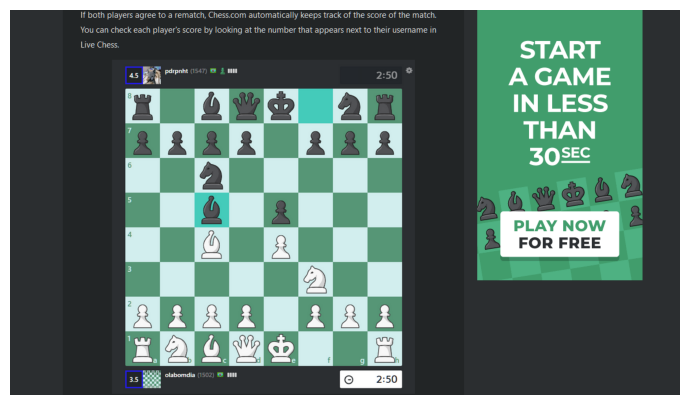

In [ ]:
# We will start with our original image - 
import cv2
import imutils 
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('res/board_webpage.png')
plt.figure(figsize=(19,12))
plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.show()

## Preprocessing the image
The naive approach we will attempt is to identify all squares in the image. If we manage to find 8 squares which are right next to each other and are of the same size, then this will be our chess board. 
We know that this is probably not a perfect approach, but it will surly advance us towards a better solution.

We want our algorithm to be able to handle different boards and different backgrounds.
All we care about is the shapes in the image so we will try to find the contours in the image. 



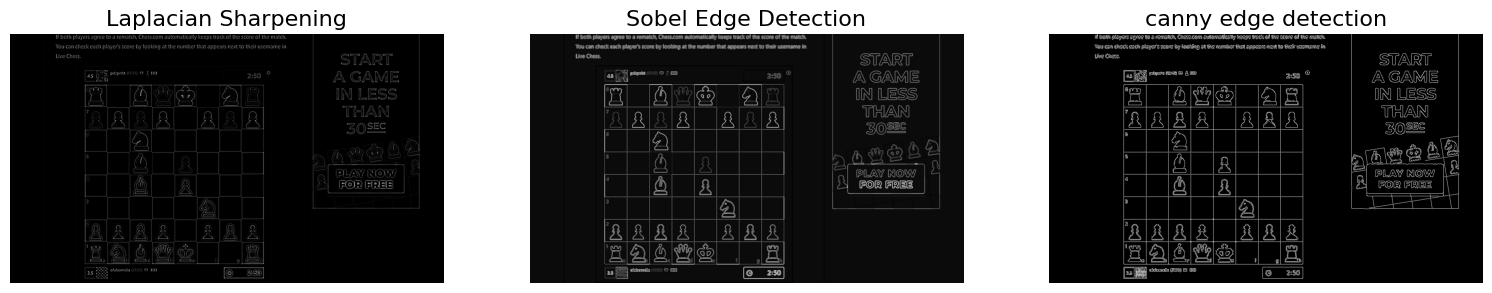

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Try several different edge detection methods - 
# 1. Laplacian of gaussian - Gaussian blur + Laplacian edge detection (gonzalsez and woods, image processing course book)
l_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
img_sharp_laplac = cv2.filter2D(blurred, -1, l_kernel)

# 2. Sobel Edge detection - https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm
# The concept is similar to laplactian, in the fact that we want to find a gradient in the image,
# The strength of the sobel operator comes from taking the derivative of the image in the x and y direction, instead of just looking at overall difference like the laplacian
sobel_y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_x_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
img_sharp_sobel_x = np.absolute(cv2.filter2D(gray, cv2.CV_64F, sobel_x_kernel))
img_sharp_sobel_y = np.absolute(cv2.filter2D(gray, cv2.CV_64F, sobel_y_kernel))

magnitude = np.sqrt(img_sharp_sobel_x**2 + img_sharp_sobel_y**2)
bias_correction = np.mean(magnitude)
corrected_magnitude_sobel = np.abs(magnitude - bias_correction)

# Normalize to 0-255 range
corrected_magnitude_sobel = np.uint8(255 * corrected_magnitude_sobel / np.max(corrected_magnitude_sobel))

# image_sobel = cv2.addWeighted(img_sharp_sobel_x, 0.5, img_sharp_sobel_y, 0.5, 0)
# 3. Canny edge detection -  https://www.youtube.com/watch?v=sRFM5IEqR2w&ab_channel=Computerphile
'''
 Essentially takes the output of a sobel operator and does some cleaning up.
        a. thins the edges
        We do this by finding local maximum of the edge in a mask, eliminating what is not the local maximum. this way we only keep the
        edge pixels on the "direction" of the edge
        b. does a 2-level thresholding (hysteresis) -
            i. Set two thresholds - high and low.
            ii. If the pixel is above the high threshold, it will be automaticvally included
            iii. If the pixel is below the low threshold, it will be automatically excluded
            iv. If the pixel is between the two thresholds, it will be included only if it is connected to a pixel above the high threshold
'''
t_lower = 60  # Lower Threshold 
t_upper = 200  # Upper threshold 
aperture_size = 3  # Aperture size 

img_canny = cv2.Canny(gray, t_lower, t_upper,  
            apertureSize=aperture_size, L2gradient =True) 

plt.figure(figsize=(19,12))
plt.subplot(131)
plt.imshow(img_sharp_laplac, cmap='gray')
plt.title('Laplacian Sharpening', fontsize=16)
plt.axis('off')
plt.subplot(132)
plt.imshow(corrected_magnitude_sobel, cmap='gray')
plt.title('Sobel Edge Detection', fontsize=16)
plt.axis('off')
plt.subplot(133)
plt.imshow(img_canny, cmap='gray')
plt.title('canny edge detection', fontsize=16)
plt.axis('off')
plt.show()

Using the Canny Edge detection technique we get a good and sharp representation of the contours in the image.
Now in order to detect squares, we will use  **morphological filtering**.
The concept of morphological filtering is to identify certain patterns or shapes in an image, and transforming them in some way.

We can use morphological filtering to detect patterns in the image. We can attempt to identify the square itself, but we do not know it's size so it will be quite hard. Instead we can attempt to identify square corners, and from there construct our square.
We have attempted to implement this approach, but run into some obstacles -
1. the corner detection yields a lot of false positives (corners which are not part of a square)
2. the process of grouping corners into squares is not trivial. especially in the case of a chess board, where in fact one can look at the board as separate squares, or as squares which are contained within each other in growing size.

While both problems are algorithmically solvable, we have devised a better way to use morphological filtering to solve our chess problem.
Another pattern that appears in a chess board is the cross - 


In [ ]:
small_kernel_size = 3
large_kernel_size = small_kernel_size*4
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(large_kernel_size,large_kernel_size))
print(kernel_cross)

[[0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]]


In every intersection of 4 tiles in the edge image there should be a cross. We can attempt to identify them in the following way - 


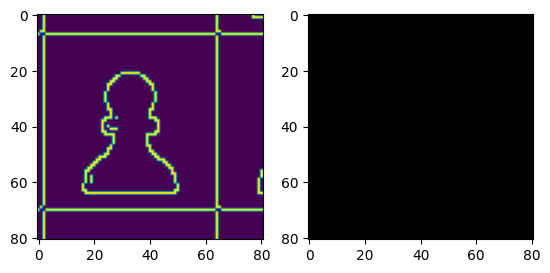

In [ ]:
def display_subimages(s, img1, img2):
    i,j,l = s
    sub1 = img1[i:i+l+1, j:j+l+1]
    sub2 = img2[i:i+l+1, j:j+l+1]
    plt.subplot(121)
    plt.imshow(sub1)
    plt.subplot(122)
    plt.imshow(sub2, cmap='gray')
    plt.show()
img_hms = cv2.morphologyEx(img_canny, cv2.MORPH_HITMISS, kernel_cross)
display_subimages((200, 270, 80), img_canny, img_hms)


Well... this didn't work so well.
If we examine the canny image more carefully, we can notice some small inaccuracies which might cause this affect - 


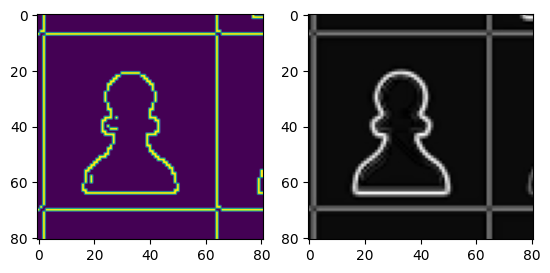

In [ ]:

display_subimages((200, 270, 80), img_canny, corrected_magnitude_sobel)

We see that in all of our edge detection methods there is some uncertainty in the intersections, so the crosses are not found in the image.
This might be solvable by using the "Closure" morphological filter, but using "Closure" might cause some unwanted side affects (such as corner dilation).
A simpler solution is to alter our cross filter to not require an exact match at the center of the cross 

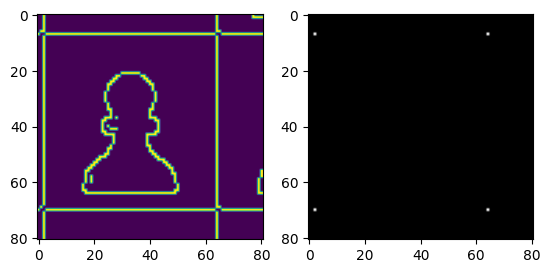

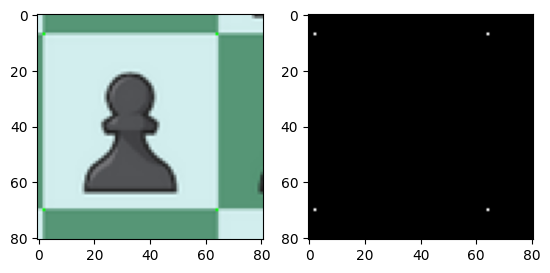

In [ ]:
def draw_on_image(mask_img, original_image, color):
    # for every pixel which is not zero in the mask_image, draw a point in the original image - 
    new_image = original_image.copy()
    new_image[np.nonzero(mask_img)] = color
    return new_image


kernel_cross[large_kernel_size//2 - small_kernel_size//2: large_kernel_size//2 + small_kernel_size//2+1,
                  large_kernel_size//2 - small_kernel_size//2: large_kernel_size//2 + small_kernel_size//2+1] = 0 
img_hms = cv2.morphologyEx(img_canny, cv2.MORPH_HITMISS, kernel_cross)
display_subimages((200, 270, 80), img_canny, img_hms)

crossed_image = draw_on_image(img_hms, image, (0, 255, 0)) # green
# display_subimages((200, 270, 80), img_canny, img_hms)
display_subimages((200, 270, 80), crossed_image, img_hms)


Now that we've identified our crosses, we want to look for a pattern of a chess board - which means finding 7 sets of crosses in a row and in a line.
We do it by sorting the found crosses by y and then by x, then traversing the found crosses to see if we have 7 consecutive crosses which are evenly spread (in the same distance from one another)

In [ ]:


class Cross(object):
    def __init__(self, i, j):
        self.row = i
        self.col = j
    def __str__(self) -> str:
        return f"({self.row}, {self.col})"
    def __repr__(self) -> str:
        return f"({self.row}, {self.col})"
def find_even_spread_dots(arr, dist_mistake, num_dots=7):
    # assume array is sorted 
    for i in range(0, len(arr)-(num_dots-1)):
            distances = [arr[j+1] - arr[j] for j in range(i, i+num_dots-1)]
            if max(distances) - min(distances) > dist_mistake: 
                continue
            suspected_square_delim = sum(distances)//len(distances)
            yield i, suspected_square_delim

def verify_even_spread_dots(arr, dist_mistake, suspected_square_delim):
    distances = [arr[j+1] - arr[j] for j in range(0, len(arr)-1)]
    if max(distances) - min(distances) > dist_mistake: 
        return False
    if sum(distances)//len(distances) < suspected_square_delim+ dist_mistake and sum(distances)//len(distances) > suspected_square_delim - dist_mistake:
        return True
    return False

In [ ]:

def detect_chess_board(img, original_image):
    '''
    receive a canny image. my target is to find the crosses which are created when 4 squares of the chess board are connected.
    sometimes the crosses are not well connected in the canny image, so the approach is to use Hit-And-Miss morphological operation
    to find the crosses, but to also allow for errors in the middle of the crosses.

    After doing hit-and-miss, search for 7 consecutive crosses in a row, and then search for 7 consecutive crosses in a column.
    Try to find in this fashion the cross at the top left corner of the board and the delimiter of a square in the chess board. 
    '''

    # Step 1 - do Hit-And-Miss morphological operation to find the crosses
    small_kernel_size = 3
    large_kernel_size = small_kernel_size*4
    kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(large_kernel_size,large_kernel_size))
    # make the center un-crossed
    kernel_cross[large_kernel_size//2 - small_kernel_size//2: large_kernel_size//2 + small_kernel_size//2+1,
                  large_kernel_size//2 - small_kernel_size//2: large_kernel_size//2 + small_kernel_size//2+1] = 0 
    img_hms = cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel_cross)
    original_image = draw_on_image(img_hms, original_image, (0, 255, 0)) # green

    # Step 2 - in the hms image, search for aligned crosses.
    crosses = [Cross(i,j) for i,j in np.argwhere(img_hms)]
    crosses_by_row = {i: [] for i in range(img_hms.shape[0])}
    crosses_by_col = {j: [] for j in range(img_hms.shape[1])}
    for c in crosses:
        
        # they should be sorted
        crosses_by_row[c.row].append(c)
        crosses_by_col[c.col].append(c)

    # for every cross, search for a cross in the same row and column.
    # chess is 8x8
    # i should have 7x7 of crosses in the board.
    found = False
    suspected_square_delim = 0
    top_cross = None
    for row in sorted(crosses_by_row.keys()):
        r = 1 # search in r rows below and r rows above, to allow some mistakes
        dist_mistake = 1 # allow mistake in distance between crosses
        corsses_in_row = crosses_by_row[row]
        for i in range(1, r+1):
            if row-i in crosses_by_row:
                corsses_in_row += crosses_by_row[row-i]
            if row+i in crosses_by_row:
                corsses_in_row += crosses_by_row[row+i]

        
        if len(corsses_in_row) < 7:
            continue
    
        # now i need to verify that i have 7 crosses that are spaced evenly.
        # i will sort them and then check that the difference between each two is the same.
        sorted_c_in_row = sorted(corsses_in_row, key= lambda c: c.col)
        for i, suspected_square_delim in find_even_spread_dots([c.col for c in sorted_c_in_row], dist_mistake, num_dots=7):
            
            # got a suspected starting cross, now check if the columns of it match
            suspected_cross = sorted_c_in_row[i]
            suspected_col = suspected_cross.col
            print(f"[+] found a suspected starting cross - ", {suspected_cross, suspected_square_delim})
            
            corsses_in_col = crosses_by_col[suspected_col]
            for k in range(1, r+1):
                if suspected_col-k in crosses_by_col:
                    corsses_in_col += crosses_by_col[suspected_col-k]
                if suspected_col+k in crosses_by_col:
                    corsses_in_col += crosses_by_col[suspected_col+k]

            if len(corsses_in_col) < 7:
                continue
            # sort the rows in the suspected colum
            sorted_c_in_col = sorted(corsses_in_col,  key= lambda c: c.row)
            initial_pos = sorted_c_in_col.index(suspected_cross)
            rows_to_check = [c.row for c in sorted_c_in_col[initial_pos:initial_pos+7]]
            
            if verify_even_spread_dots(rows_to_check, dist_mistake, suspected_square_delim):
                # TODO: i can even verify that each row and column now have good alignment, but i think it is not needed.  
                # I can also make this more robust to try to find the board even in case of some missing crosses.
                found = True
                top_cross = suspected_cross
                break
        if found:
            break
    
    if not found:
        print("did not find a chess board")
        return None

    # I need +1 here to capture the border of the tile.
    suspected_square_delim +=1
    # i've found a chess board - let's return the bounding box (upper left, lower right) and square delimiter of the board
    top_left = (top_cross.row - suspected_square_delim, top_cross.col - suspected_square_delim)
    bottom_right = (top_cross.row + 7*suspected_square_delim, top_cross.col + 7*suspected_square_delim)
    return (top_left, bottom_right, suspected_square_delim)

In [ ]:
(top_left, bottom_right, delim) = detect_chess_board(img_canny, image)
print(f"[+] Found chess board - top left: {top_left}, bottom right: {bottom_right}, delim: {delim}")

[+] found a suspected starting cross -  {(207, 272), 62}
[+] Found chess board - top left: (144, 209), bottom right: (648, 713), delim: 63


Let's write some code to visualize our findings - 

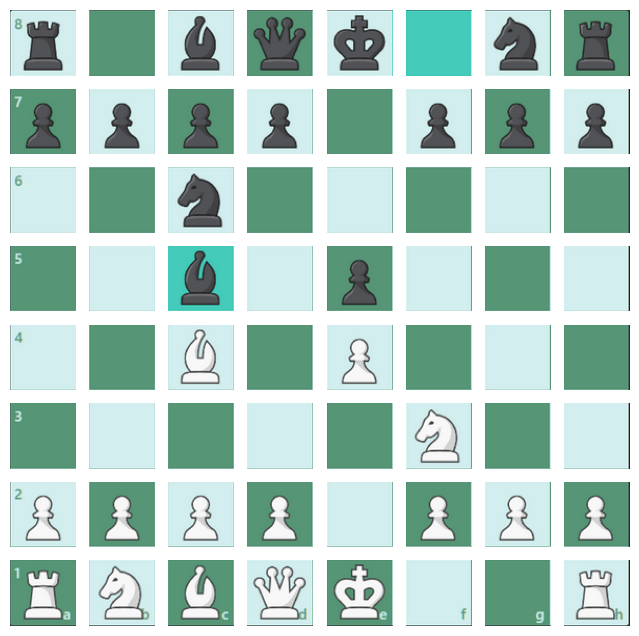

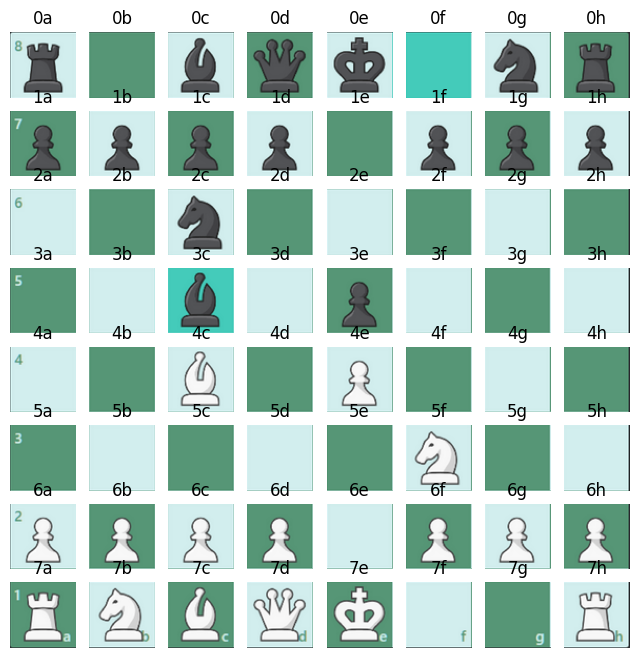

: 

In [ ]:
def split_chess_board(image, top_left, bottom_right, delim):
    chess_board_squares = []
    for i in range(8):
        row = []
        for j in range(8):
            row.append(image[top_left[0] + i*delim: top_left[0] + (i+1)*delim, top_left[1] + j*delim: top_left[1] + (j+1)*delim].copy())
        chess_board_squares.append(row)
    return chess_board_squares
def display_board_image(chess_board_squares, labels=None):
    fig = plt.figure(figsize=(8, 8))    
    for i in range(8):
        for j in range(8):
            ax = fig.add_subplot(8, 8, i*8+j+1)
            if labels is not None:
                ax.set_title(labels[i*8 + j])
            ax.imshow(chess_board_squares[i][j])
            ax.axis('off')
    plt.show()

splitted_board = split_chess_board(image, top_left, bottom_right, delim)
display_board_image(splitted_board)
display_board_image(splitted_board, labels=[f"{i}{chr(ord('a')+j)}" for i in range(8) for j in range(8)])

## Conclusion - Identifing a chess board in an image

We've successfully identified our board and split it into pieces. Now for our next part - classifying the tiles.
In the future, if need be, this identification method can become more robust by relaxing the constraints on cross placement while introducing more sanity checks (e.g. allow for looser fits or the crosses on the screen).
We can now move on to the next part - classifying chess pieces!





## Classification of chess tiles
This is a classic classification problems, for which there are many common ML models and approaches.
We decided to use a supervised classification approach, using data of different chess pieces and their label.

In this notebook we explore different ML approaches and different alterations of the dataset, and see how we can reach a model with the highest accuracy. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import os
from fastcore.all import *
import matplotlib.pyplot as plt
import itertools

# from fastai.data.all import *
# from fastai.vision.all import *
# from fastai.vision.all import *
import cv2
from PIL import Image
import pathlib

## Choosing a dataset
We have found two possible datasets which we can use for classification training. 
The first dataset contains a combination of painted and real world images of chess pieces.
The second dataset contains only computer-animated images of chess pieces.

Let's take a look at the dataset - 


In [3]:
def get_images_for_subpath(data_dir, subpath):
    image_paths = list(pathlib.Path(os.path.join(data_dir, subpath)).glob('*.jpg')) + list(pathlib.Path(os.path.join(data_dir, subpath)).glob('*.png'))
    # image_paths = pathlib.Path(os.path.join(data_dir, subpath)).glob('*.png')
    return [str(i) for i in image_paths]
    # print(f"number of images in {os.path.join(data_dir, subpath)}: {len(list(image_paths))}")
    # return np.array([Image.open(p) for p in image_paths])

def display_df(df):
    # print one image per label
    one_item_per_label_sample = df.groupby('label').sample(n=1).reset_index(drop=True)
    images = [Image.open(p) for p in one_item_per_label_sample['image']]
    print(images)
    fig, axes = plt.subplots(1, len(images), figsize=(5*len(images), 5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(one_item_per_label_sample['label'][i])
    plt.show()

                                               image   label
0  chessboard_identifier\pices_db\data_real\bisho...  bishop
1  chessboard_identifier\pices_db\data_real\bisho...  bishop
2  chessboard_identifier\pices_db\data_real\bisho...  bishop
3  chessboard_identifier\pices_db\data_real\bisho...  bishop
4  chessboard_identifier\pices_db\data_real\bisho...  bishop
5  chessboard_identifier\pices_db\data_real\bisho...  bishop
6  chessboard_identifier\pices_db\data_real\bisho...  bishop
7  chessboard_identifier\pices_db\data_real\bisho...  bishop
8  chessboard_identifier\pices_db\data_real\bisho...  bishop
9  chessboard_identifier\pices_db\data_real\bisho...  bishop
[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C7861322D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C7E733F5D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C785968390>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x1C7860C6150>]


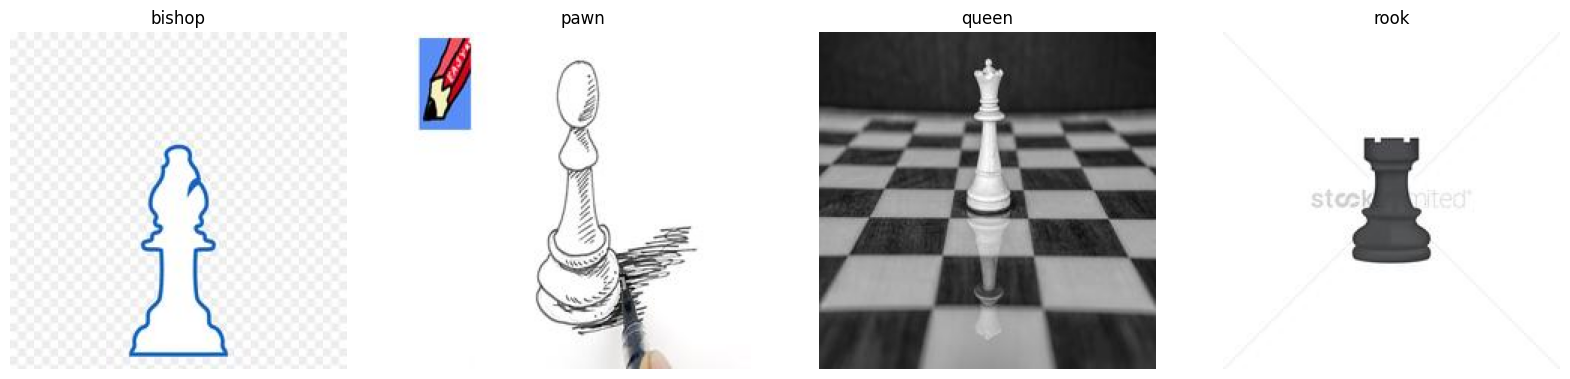

In [ ]:
PIECES_DB_DIR = "chessboard_identifier/pices_db"
data_dir = os.path.join(PIECES_DB_DIR, "data_real")


bishop_images = get_images_for_subpath(data_dir, "bishop_resized_224", )
knight_images = get_images_for_subpath( data_dir, "knight_resized_224")
pawn_images = get_images_for_subpath(data_dir, "pawn_resized_224")
# king_images = get_images_for_subpath("king")
queen_images = get_images_for_subpath(data_dir, "queen_resized_224")
rook_images = get_images_for_subpath(data_dir, "rook_resized_224")

# create a dataframe with the images and their labels
df_real = pd.DataFrame({'image': np.concatenate([bishop_images, knight_images, pawn_images, queen_images, rook_images]),
                   'label': ['bishop']*len(bishop_images) + ['knight']*len(knight_images) + ['pawn']*len(pawn_images) + ['queen']*len(queen_images) + ['rook']*len(rook_images)})
print(df_real.head(10))
display_df(df_real)

We see that this dataset is quite messy, the images are varied in background and style, and do not match our usecase of a computer chess game.
Also note that this dataset does not have images of kings...

Let's take a look at the second dataset  

                                               image   label
0  chessboard_identifier\pices_db\data_icons\bish...  bishop
1  chessboard_identifier\pices_db\data_icons\bish...  bishop
2  chessboard_identifier\pices_db\data_icons\bish...  bishop
3  chessboard_identifier\pices_db\data_icons\bish...  bishop
4  chessboard_identifier\pices_db\data_icons\bish...  bishop
5  chessboard_identifier\pices_db\data_icons\bish...  bishop
6  chessboard_identifier\pices_db\data_icons\bish...  bishop
7  chessboard_identifier\pices_db\data_icons\bish...  bishop
8  chessboard_identifier\pices_db\data_icons\bish...  bishop
9  chessboard_identifier\pices_db\data_icons\bish...  bishop
[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=85x85 at 0x1C786233090>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=85x85 at 0x1C7859ADAD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=85x85 at 0x1C7861F0690>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=85x85 at 0x1C786150790>, <PIL.PngImagePlu

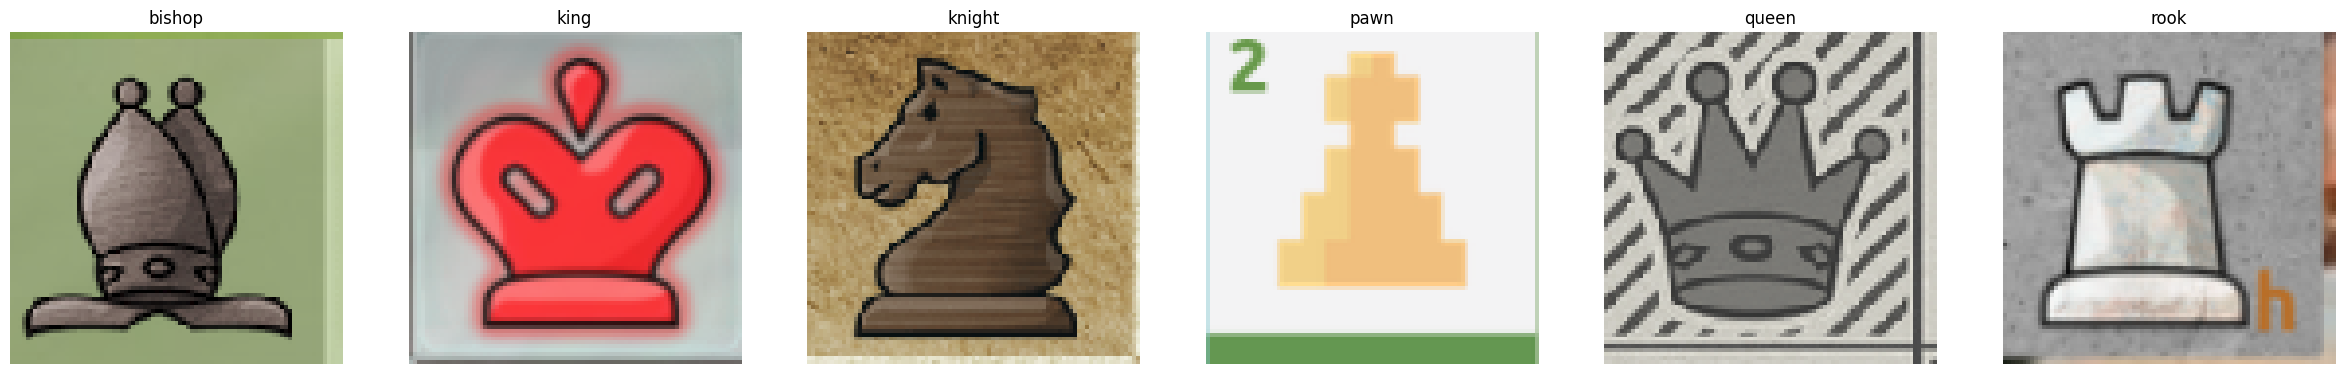

In [16]:
data_dir = os.path.join(PIECES_DB_DIR, "data_icons")


bishop_images = get_images_for_subpath(data_dir, "bishop")
knight_images = get_images_for_subpath(data_dir, "knight")
pawn_images = get_images_for_subpath(data_dir, "pawn")
king_images = get_images_for_subpath(data_dir, "king")
queen_images = get_images_for_subpath(data_dir, "queen")
rook_images = get_images_for_subpath(data_dir, "rook")

# create a dataframe with the images and their labels
df = pd.DataFrame({'image': np.concatenate([bishop_images, knight_images, pawn_images, king_images, queen_images, rook_images]),
                   'label': ['bishop']*len(bishop_images) + ['knight']*len(knight_images) + ['pawn']*len(pawn_images) + ['king']*len(king_images) + ['queen']*len(queen_images) + ['rook']*len(rook_images)})
print(df.head(10))
display_df(df)

This dataset matches our needs better, as the images are infact icons of chess pieces.
let's split the data into train and test, and try to apply a simple supervised SVM classification model 

In [17]:
df.to_csv(os.path.join(PIECES_DB_DIR, "mainframe.csv"), index=False)

In [18]:
from sklearn.model_selection import train_test_split
# get 0.8 of each label for training and 0.2 for validation
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

print(train.head(10))
print(test.head(10))


                                                 image   label
210  chessboard_identifier\pices_db\data_icons\pawn...    pawn
108  chessboard_identifier\pices_db\data_icons\knig...  knight
340  chessboard_identifier\pices_db\data_icons\pawn...    pawn
87   chessboard_identifier\pices_db\data_icons\knig...  knight
24   chessboard_identifier\pices_db\data_icons\bish...  bishop
493  chessboard_identifier\pices_db\data_icons\rook...    rook
348  chessboard_identifier\pices_db\data_icons\pawn...    pawn
76   chessboard_identifier\pices_db\data_icons\knig...  knight
242  chessboard_identifier\pices_db\data_icons\pawn...    pawn
360  chessboard_identifier\pices_db\data_icons\pawn...    pawn
                                                 image   label
266  chessboard_identifier\pices_db\data_icons\pawn...    pawn
149  chessboard_identifier\pices_db\data_icons\pawn...    pawn
346  chessboard_identifier\pices_db\data_icons\pawn...    pawn
136  chessboard_identifier\pices_db\data_icons\knig... 

Text(0, 0.5, 'count')

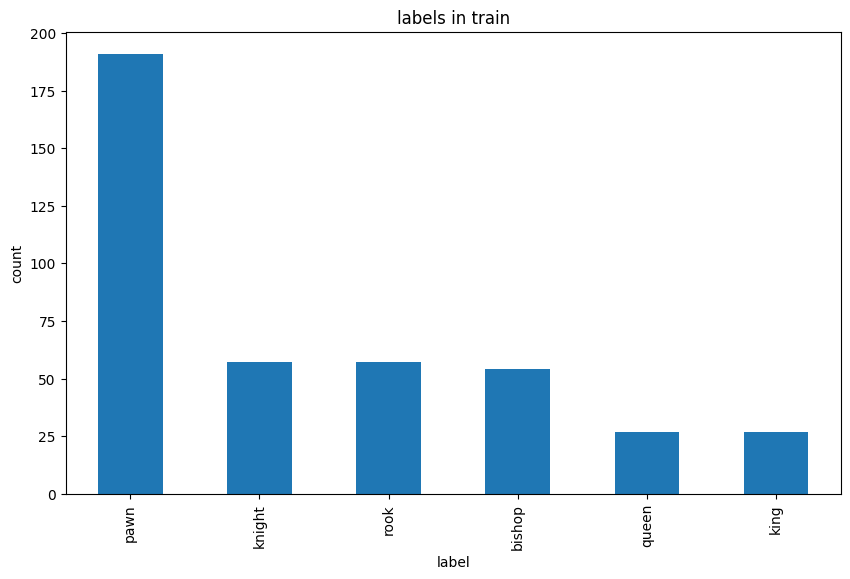

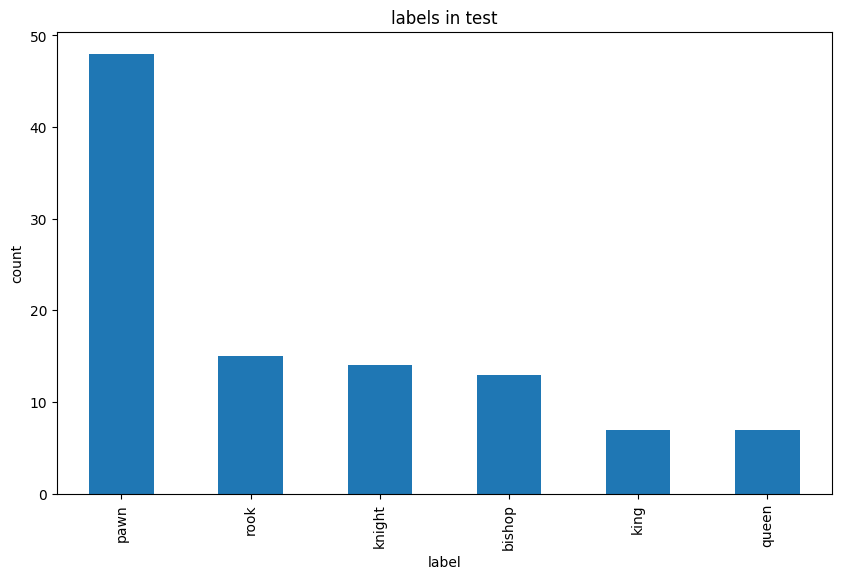

In [19]:
def count_labels(df):
    return df['label'].value_counts()
count_labels(train), count_labels(test)
# show the labels in a plot
# show the labels in a plot
fig, ax = plt.subplots(figsize=(10, 6))
count_labels(train).plot(kind='bar')
ax.set_title('labels in train')
ax.set_xlabel('label')
ax.set_ylabel('count')

fig, ax = plt.subplots(figsize=(10, 6))
count_labels(test).plot(kind='bar')
ax.set_title('labels in test')
ax.set_xlabel('label')
ax.set_ylabel('count')


In [43]:
# display a plot of some train images 
x_train_gs = train['image']
y_train_gs = train['label']


We See that there is quite a large advantage in data points towards the pawn piece. This is plausible because indeed most of the pieces on the chess board are pawns.
For now we will keep it as-is, but we should keep in mind that this might cause a variation in favor of pawn in the classification phase.

### Native Approach - SVM
Let's try a classic and relatively light ML model - SVM. it should work well enough for high dimension problems such as this one. 

In [20]:
def get_images(image_paths):
    return np.array([Image.open(p) for p in image_paths])

x_train = get_images(train['image'])
y_train = np.array(train['label'])
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = get_images(test['image'])
y_test = np.array(test['label'])
x_test = x_test.reshape(x_test.shape[0], -1)


In [21]:

def do_svm(x_train, y_train, x_test, y_test): 
    model = SVC(kernel='linear', C=1E9)
    print("[+] training model")
    model.fit(x_train,y_train)
    print("[+] testing model")
    result = model.predict(x_test)
    mask = result==y_test
    correct = np.count_nonzero(mask)
    print (correct*100.0/result.size)
    return model

model_1 = do_svm(x_train, y_train, x_test, y_test)


[+] training model
[+] testing model
83.65384615384616


### SVM With Data Augmentation - grayscale 
We see that a naive applience of SVM provides decent results, at 83%. 
This is not optimal, perhaps because we do not have many samples of the images, and they are varied in color and background.
To remove some of these features, we will first try to provide the model with grayscale images.


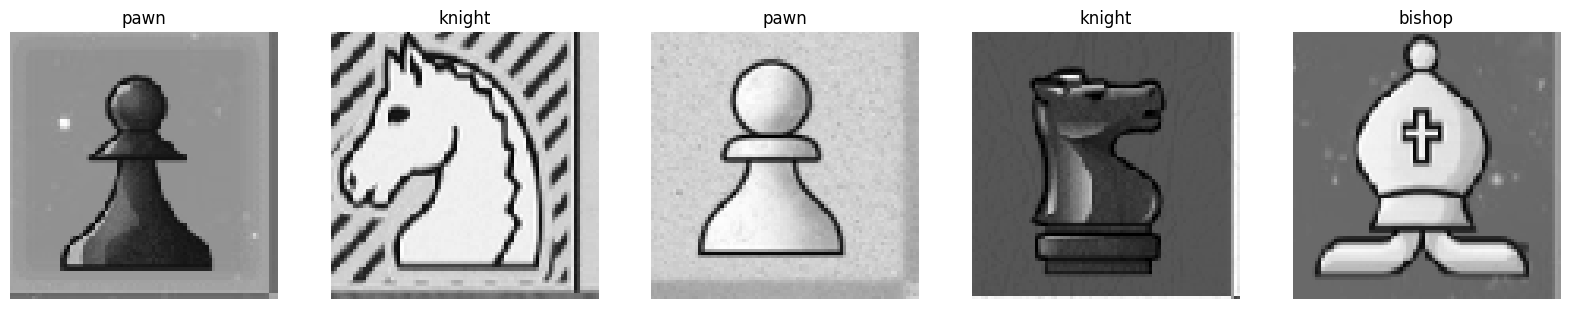

In [44]:
def get_images_gs(image_paths):
    return np.array([cv2.imread(p,  cv2.IMREAD_GRAYSCALE) for p in image_paths])

# display some train images in gs for visualization
x_train_gs = get_images_gs(train['image'])
fig, axes = plt.subplots(1, 5, figsize=(20, 20))

for i, ax in enumerate(axes):
    ax.imshow(x_train_gs[i], cmap='gray')
    ax.axis('off')
    ax.set_title(train['label'].iloc[i])
plt.show()



In [23]:
x_train_gs = get_images_gs(train['image'])
y_train_gs = np.array(train['label'])
x_train_gs = x_train_gs.reshape(x_train_gs.shape[0], -1)
x_test_gs = get_images_gs(test['image'])
y_test_gs = np.array(test['label'])
x_test_gs = x_test_gs.reshape(x_test_gs.shape[0], -1)
model_gs = do_svm(x_train_gs, y_train_gs, x_test_gs, y_test_gs)


[+] training model
[+] testing model
83.65384615384616


### SVM With Data Augmentation - Edges (using Canny edge detection) 
We see no improvement when using grayscale format, but we do not fret - we will try to lower the dimension even more by using canny edge detection and passing the edges to the model.


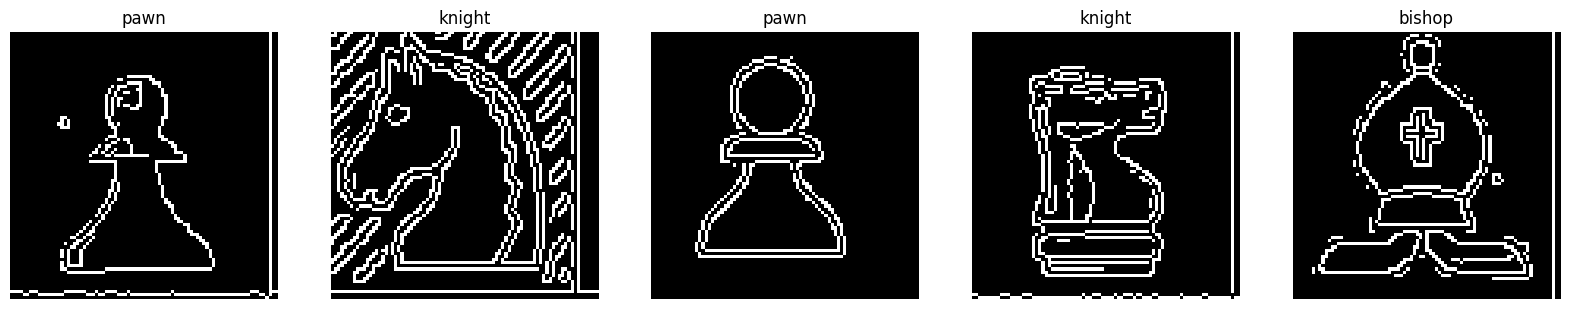

In [45]:
def canny(img):
    t_lower = 60  # Lower Threshold 
    t_upper = 200  # Upper threshold 
    aperture_size = 3  # Aperture size 
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_canny = cv2.Canny(img_gray, t_lower, t_upper,  
                 apertureSize=aperture_size, L2gradient =True) 
    return img_canny

def get_images_canny(image_paths):
    return np.array([canny(cv2.imread(p)) for p in image_paths])
# display some train images in gs for visualization
x_train_gs = get_images_canny(train['image'])
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i, ax in enumerate(axes):
    ax.imshow(x_train_gs[i], cmap='gray')
    ax.axis('off')
    ax.set_title(train['label'].iloc[i])
plt.show()


In [25]:

x_train_c = get_images_canny(train['image'])
y_train_c = np.array(train['label'])
x_train_c = x_train_c.reshape(x_train_c.shape[0], -1)
x_test_c = get_images_canny(test['image'])
y_test_c = np.array(test['label'])
x_test_c = x_test_c.reshape(x_test_c.shape[0], -1)
model_canny = do_svm(x_train_c, y_train_c, x_test_c, y_test_c)


[+] training model
[+] testing model
88.46153846153847


### SVM With Data Augmentation - HOG 
We see that a canny filter does improve the detection chances but they are still not optimal. 
Let's try HOG feature extraction, which might improve on Canny.

In [1]:
# do some HOG processing on the images so it will be better
import cv2
def hog(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    win_size = img_gray.shape
    # resize image to be multiple of 8 
    win_size = (win_size[1] - win_size[1] % 8, win_size[0] - win_size[0] % 8)
    img_gray = cv2.resize(img_gray, win_size)
    cell_size = (8, 8)
    block_size = (16, 16)
    block_stride = (8, 8)
    num_bins = 9
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)
    hog_descriptor = hog.compute(img)
    return hog_descriptor
    # cv2.HOGDescriptor(win_size=(64, 128),
    #               block_size=(16, 16),
    #               block_stride=(8, 8),
    #               cell_size=(8, 8),
    #               nbins=9,
    #               win_sigma=DEFAULT_WIN_SIGMA,
    #               threshold_L2hys=0.2,
    #               gamma_correction=true,
    #               nlevels=DEFAULT_NLEVELS)
    # bin_n = 16
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # gx = cv2.Sobel(gray, cv2.CV_32F, 1, 0)
    # gy = cv2.Sobel(gray, cv2.CV_32F, 0, 1)
    # mag, ang = cv2.cartToPolar(gx, gy)
    # bins = np.int32(bin_n * ang/(2*np.pi))
    # bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    # mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    # hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells,
    # mag_cells)]
    # hist = np.hstack(hists)
    # return hist


def get_images_hog(image_paths):
    return np.array([hog(cv2.imread(p)) for p in image_paths])
    # return np.array([Image.open(p) for p in image_paths])

# Display some hog representation of the images for visualization
x_train_hog = get_images_hog(train['image'])
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i, ax in enumerate(axes):
    ax.plot(x_train_hog[i])
    ax.set_title(train['label'].iloc[i])
plt.show()

ModuleNotFoundError: No module named 'cv2'

The current visualization does not makes much sense at this form, but it does encapsulate the gradients found in the image. 

In [47]:

x_train_h = get_images_hog(train['image'])
y_train_h = np.array(train['label'])
x_train_h = x_train_h.reshape(x_train_h.shape[0], -1)
x_test_h = get_images_hog(test['image'])
y_test_h = np.array(test['label'])
x_test_h = x_test_h.reshape(x_test_h.shape[0], -1)
model_hog = do_svm(x_train_h, y_train_h, x_test_h, y_test_h)



[+] training model
[+] testing model
100.0


In [59]:
# # use model_hog on some of the eval images and plot the results 
# def predict_and_plot(model, x_test, y_test):
#     result = model.predict(x_test)
#     mask = result==y_test
#     correct = np.count_nonzero(mask)
#     print (correct*100.0/result.size)
#     return result, mask

# def plot_results(result, mask, x_testa, y_test):
#     fig, axes = plt.subplots(1, 5, figsize=(20, 20))

#     for i, ax in enumerate(axes):
#         ax.imshow(x_train_gs[i], cmap='gray')
#         ax.axis('off')
#         ax.set_title(f"predicted: {result[i]}, actual: {y_test[i]}")
#     plt.show()

# result, mask = predict_and_plot(model_hog, x_test_h[:5], y_test_h[:5])
# test_images = get_images_gs(test['image'])
# # test_images
# plot_results(result, mask, test_images[:5], y_test_h[:5])

We see that using HOG feature extraction yields excellent results!
        

### Neural Network Approach - no preprocessing
For the research purposes, let's try to use a pre trained model and fine-tune it to our dataset.
As the input to this model, we will give the original image without edge detection or other such preprocessing, and see what the model can do. 

In [ ]:
# until now we got a 84%~ accuracy with the SVM learning on unmanipulated images
# let's try to use a pre-trained model with fine tuning to get better results
from transformers import ViTImageProcessor
import torch
model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

c:\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")

GPU: NVIDIA GeForce GTX 1650 is available.


In [ ]:
# train_images = get_images(train['image'])
# processor(train_images, return_tensors='pt')
import evaluate
import datasets
def vit_transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([Image.open(x) for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['label'] = example_batch['label']
    return inputs

train_hf = datasets.Dataset.from_pandas(train)
prepared_ds_train =  train_hf.with_transform(vit_transform)
test_hf = datasets.Dataset.from_pandas(test)
prepared_ds_test =  test_hf.with_transform(vit_transform)

labels = list(set(train_hf['label']))
labels_to_ids = {label: i for i, label in enumerate(labels)}
ids_to_labels = {i: label for label, i in labels_to_ids.items()}
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([labels_to_ids[x['label']] for x in batch])
    }
metric = evaluate.load("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)


In [ ]:
from transformers import ViTForImageClassification

# labels = train_hf.features['label'].names
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"got labels - {labels}")
model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label=ids_to_labels,
    label2id=labels_to_ids
)
model.to(device)

got labels - ['knight', 'king', 'queen', 'rook', 'pawn', 'bishop']


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-chess",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

c:\Python\Python311\Lib\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds_train,
    eval_dataset=prepared_ds_test,
    tokenizer=processor,
)

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

  0%|          | 0/104 [00:00<?, ?it/s]c:\Python\Python311\Lib\site-packages\transformers\models\vit\modeling_vit.py:261: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  context_layer = torch.nn.functional.scaled_dot_product_attention(
 10%|▉         | 10/104 [01:04<09:19,  5.96s/it]

{'loss': 1.4022, 'grad_norm': 1.5529154539108276, 'learning_rate': 0.00018076923076923077, 'epoch': 0.38}


 19%|█▉        | 20/104 [02:04<08:09,  5.82s/it]

{'loss': 0.6631, 'grad_norm': 1.093721866607666, 'learning_rate': 0.00016153846153846155, 'epoch': 0.77}


 29%|██▉       | 30/104 [03:00<06:49,  5.54s/it]

{'loss': 0.2925, 'grad_norm': 0.8787147402763367, 'learning_rate': 0.0001423076923076923, 'epoch': 1.15}


 38%|███▊      | 40/104 [03:56<05:57,  5.58s/it]

{'loss': 0.2233, 'grad_norm': 1.7901793718338013, 'learning_rate': 0.0001230769230769231, 'epoch': 1.54}


 48%|████▊     | 50/104 [04:52<05:04,  5.63s/it]

{'loss': 0.1452, 'grad_norm': 0.42619234323501587, 'learning_rate': 0.00010384615384615386, 'epoch': 1.92}


 58%|█████▊    | 60/104 [05:47<04:04,  5.56s/it]

{'loss': 0.1033, 'grad_norm': 0.3171345591545105, 'learning_rate': 8.461538461538461e-05, 'epoch': 2.31}


 67%|██████▋   | 70/104 [06:44<03:10,  5.60s/it]

{'loss': 0.0876, 'grad_norm': 0.45715948939323425, 'learning_rate': 6.538461538461539e-05, 'epoch': 2.69}


 77%|███████▋  | 80/104 [07:39<02:11,  5.50s/it]

{'loss': 0.0861, 'grad_norm': 0.2754431366920471, 'learning_rate': 4.615384615384616e-05, 'epoch': 3.08}


 87%|████████▋ | 90/104 [08:36<01:19,  5.66s/it]

{'loss': 0.0765, 'grad_norm': 0.23977750539779663, 'learning_rate': 2.6923076923076923e-05, 'epoch': 3.46}


 96%|█████████▌| 100/104 [09:33<00:22,  5.68s/it]

{'loss': 0.068, 'grad_norm': 0.22177550196647644, 'learning_rate': 7.692307692307694e-06, 'epoch': 3.85}


                                                 
 96%|█████████▌| 100/104 [09:47<00:22,  5.68s/it]

{'eval_loss': 0.11474638432264328, 'eval_accuracy': 0.9711538461538461, 'eval_runtime': 13.9996, 'eval_samples_per_second': 7.429, 'eval_steps_per_second': 0.929, 'epoch': 3.85}


100%|██████████| 104/104 [12:29<00:00,  7.20s/it]


{'train_runtime': 749.1449, 'train_samples_per_second': 2.205, 'train_steps_per_second': 0.139, 'train_loss': 0.30511270692715275, 'epoch': 4.0}
***** train metrics *****
  epoch                    =         4.0
  total_flos               = 119229179GF
  train_loss               =      0.3051
  train_runtime            =  0:12:29.14
  train_samples_per_second =       2.205
  train_steps_per_second   =       0.139


In [ ]:
metrics = trainer.evaluate(prepared_ds_test)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

100%|██████████| 13/13 [00:18<00:00,  1.46s/it]

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9712
  eval_loss               =     0.1147
  eval_runtime            = 0:00:20.07
  eval_samples_per_second =      5.179
  eval_steps_per_second   =      0.647


We got a decent accuracy of 97%, and this is without any pre-processing of our image!
We can see that this type of model is stronger in our case, and for this assignment we will use it. 

In [ ]:
# now that we have tested and trained the model, we need to use it for running the predictionima
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# test_image_6_7.png should be a pawn 
inputs = processor([np.array(Image.open('analyzed/test_image_6_7.png'), dtype=np.float16)], return_tensors='pt').to(device) 
print(inputs)
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_idx = logits.argmax(-1).item()
predicted_label = model.config.id2label[predicted_class_idx]
print(predicted_class_idx, predicted_label)

{'pixel_values': tensor([[[[-0.1294, -0.1294, -0.1294,  ..., -0.5843, -0.6549, -0.6549],
          [-0.1294, -0.1294, -0.1294,  ..., -0.5843, -0.6549, -0.6549],
          [-0.1216, -0.1216, -0.1216,  ..., -0.5843, -0.6549, -0.6549],
          ...,
          [ 0.2627,  0.2627,  0.2627,  ..., -0.5608, -0.6863, -0.6863],
          [ 0.3647,  0.3647,  0.3647,  ..., -0.5529, -0.6941, -0.6941],
          [ 0.3647,  0.3647,  0.3647,  ..., -0.5529, -0.6941, -0.6941]],

         [[ 0.1373,  0.1373,  0.1373,  ..., -0.5922, -0.7020, -0.7020],
          [ 0.1373,  0.1373,  0.1373,  ..., -0.5922, -0.7020, -0.7020],
          [ 0.1451,  0.1451,  0.1451,  ..., -0.5922, -0.7020, -0.7020],
          ...,
          [ 0.4196,  0.4196,  0.4196,  ..., -0.5686, -0.7176, -0.7176],
          [ 0.4980,  0.4980,  0.4980,  ..., -0.5608, -0.7255, -0.7255],
          [ 0.4980,  0.4980,  0.4980,  ..., -0.5608, -0.7255, -0.7255]],

         [[-0.3804, -0.3804, -0.3804,  ..., -0.6471, -0.6863, -0.6863],
          [-0

In [ ]:
# Define a function to use later in the identification process
def identify_chess_piece(model, images):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # test_image_6_7.png should be a pawn 
    inputs = processor(images, return_tensors='pt').to(device) 
    # print(inputs)
    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class_idx = logits.argmax(-1).item()
    predicted_label = model.config.id2label[predicted_class_idx]
    return predicted_label


## Conclusion
We see that if we are willing to use preprocessing, we can achieve very good results with a relatively light-weighted model (SVM).
If we find the preprocessing to expensive or problematic to implement in real-world scenarios, we can instead use a find-tuned version of a pre-trained classification model.


# Developing Position Evaluation
As a reminder, this part of the project goal is - 

**Given a board position, evaluate which player is leading and by how much!**

This is probably the most complex and difficult problem in chess, as there are many complex factors which should be taken in to consideration in such evaluation, ranging from remaining pieces strength, remaining pieces positions, to king safety positions and bishop pair advantages.

And the **proposed solution for this problem is building a deep neural network, which will take as an input the board position, and will return the estimated evaluation**.

## Evaluation Intro
There is a standard representation for chess board evaluations. Given a chess position, there is a standard to give a number which indicates who leads and by how much.

If the white player is leading, this number will be positive and sometime explicitly marked with a '+' as a prefix. If the black player is leading, the evaluation will be negative and will start with '-'.

Generally, different pieces are worth different points for evaluating. For example, a pawn (the most basic piece) is generally worth 1 point, while the rook a much stronger piece worth 5 points, and the queen, which is the most important piece except the king, is worth 9 points.
This is just the most basic idea for evaluating. In practice, many more factors should be factored in, such as the pieces positions, the positions related to other pieces, relation to other pieces remaining on the board and more.

But to summarize, an evaluation of '+1.42' means the white player is in the lead but not in such a big gap. And an evaluation of '-9.12' means the black player lead by a lot, and the game is pretty much over from here.

![Pieces Evaluations](./res/pieces_evaluations.png)

## Exploratory Data Analysis
We've used Kaggle and found a very big [dataset](https://www.kaggle.com/datasets/ronakbadhe/chess-evaluations), which maps board positions to their corresponding evaluation as calculated by Stockfish (a very complex open source chess engine).

From an inspection of the dataset 3 problems arose:
* Board representation
* Checkmate positions
* Overweighed data

### Board Representation
Our dataset looks like this:
```Csv
N1bk2nr/pp1p1ppp/8/4P3/8/8/P1qNPPPP/R3KB1R w KQ - 0 12,-409
r2k1bnr/2Np1ppp/b1n1p3/8/4P3/P4N2/1PP2PPP/R1B1K2R w KQ - 3 12,+382
8/6k1/pp1p3p/3P2p1/2PN1rP1/1P6/P6P/6K1 w - - 1 39,+431
```
The first field is the board representation, and the second value is the board evaluation (in centipawns units, which means every pawn is equal to 100 and not 1).

As you can clearly see, the board representation isn't something we can directly use in building a neural network.
This representation is actually a standard representation called FEN. FEN (Forsyth-Edwards Notation) is a concise text-based format used to describe the current state of a chessboard position, it includes the pieces positions and more advanced parts of the game which are needed to exactly describe the current state of the game.

We need to convert this representation to something we could use as the input layer for our neural network.
After learning and understanding this notation, I chose the important features for evaluating the board position (pieces placement and castling rights), and wrote a function that given a FEN string, builds a PyTorch tensor representing the board.

A chess board consists of 64 (8x8) squares, and we have 12 different pieces types (6 white and 6 black). Therefore I chose to represent the pieces placement with a long array of boolean bits. For each piece type, we have 64 bits, indicating if the piece is currently on the corresponding square.
For castling rights, I used 4 bits. And for which player turn it right now, one more bit.
In total, we have 773 (64*12+4+1) bits for representing the board.

In [1]:
import torch

def fen_to_bitboard_tensor(fen: str):
    # Initialize bitboards for different piece types
    empty = 0
    white_pawns = 0
    white_knights = 0
    white_bishops = 0
    white_rooks = 0
    white_queens = 0
    white_kings = 0
    black_pawns = 0
    black_knights = 0
    black_bishops = 0
    black_rooks = 0
    black_queens = 0
    black_kings = 0

    # Split FEN into parts
    fen_board_part, fen_turn_part, fen_castling_part, *_ = fen.split()

    # Translate FEN board representation to bitboards

    # Start from the 8th rank and a-file (0-based index)
    row = 7  
    col = 0 

    for char in fen_board_part:
        if char == '/':
			# Continue to next line
            row -= 1
            col = 0
        elif char.isnumeric():
        	# Numeric means empty spaces, so we skip accordingly to the next piece in row.
            col += int(char)
        else:
        	# Convert rank and file to a square index
            square = row * 8 + col 

            if char == 'P':
                white_pawns |= 1 << square
            elif char == 'N':
                white_knights |= 1 << square
            elif char == 'B':
                white_bishops |= 1 << square
            elif char == 'R':
                white_rooks |= 1 << square
            elif char == 'Q':
                white_queens |= 1 << square
            elif char == 'K':
                white_kings |= 1 << square
            elif char == 'p':
                black_pawns |= 1 << square
            elif char == 'n':
                black_knights |= 1 << square
            elif char == 'b':
                black_bishops |= 1 << square
            elif char == 'r':
                black_rooks |= 1 << square
            elif char == 'q':
                black_queens |= 1 << square
            elif char == 'k':
                black_kings |= 1 << square

            col += 1

    pieces = [
    	white_pawns, white_knights, white_bishops, white_rooks, white_queens, white_kings, 
    	black_pawns, black_knights, black_bishops, black_rooks, black_queens, black_kings
    ]
    pieces_board_bits = []
    for piece in pieces:
    	# Pad to 64 bits for each piece and skip the '0b' prefix
    	piece_bits_str = bin(piece)[2:].zfill(64)
    	piece_bits = [int(bit) for bit in piece_bits_str]

    	pieces_board_bits.extend(piece_bits)

    # Determine player turn
    turn_bits = [1 if fen_turn_part == 'w' else 0]

    # Determine castling rights
    in_castling = lambda x: 1 if x in fen_castling_part else 0
    white_kingside_castle = in_castling('K')
    white_queenside_castle = in_castling('Q')
    black_kingside_castle = in_castling('k')
    black_queenside_castle = in_castling('q')

    castling_bits = [white_kingside_castle, white_queenside_castle, black_kingside_castle, black_queenside_castle]

    full_board_bits = pieces_board_bits + turn_bits + castling_bits
    full_board_tensor = torch.tensor(full_board_bits, dtype=torch.float)

    return full_board_tensor

### Checkmate Positions 
Another problem that arose from our dataset can be seen in these examples:
```CSV
4Q1k1/2q2pp1/2b2b1p/p4B2/1pN5/1P5P/P4PP1/4R1K1 b - - 0 30,#+1,c6e8
3N1k2/3R4/1r5p/4p1p1/5p2/2P5/2P2PPP/6K1 b - - 0 27,#-2,b6b1
```
In the last 2 data entries, the evaluation is shown as "#-2" or "#+1" which means a checkmate can be done in a few moves.
"#-2" means black can do a checkmate in 2 moves, and "#+1" means white can do a checkmate in the next move.

These entries are unusual in their formula, and they can't be used easily for the training as the neural network is expected to give a number as the output. We can solve it by changing the score to fit our needs, if white is close to a checkmate we can give it a big lead, for example-
```CSV
4Q1k1/2q2pp1/2b2b1p/p4B2/1pN5/1P5P/P4PP1/4R1K1 b - - 0 30,#+1,c6e8
```
Can be changed to:
```CSV
4Q1k1/2q2pp1/2b2b1p/p4B2/1pN5/1P5P/P4PP1/4R1K1 b - - 0 30,+1500
```

### Overweighed Data
Another problem that arise from our dataset can be seen in these examples:
```CSV
8/6k1/pp1p3p/3P2p1/2PN1rP1/1P6/P6P/6K1 w - - 1 39,+431
6R1/5p2/5k1P/8/4BKPn/r7/3p4/8 w - - 0 57,+7019
6R1/5p1P/5k2/8/4BKPn/r7/3p4/8 b - - 0 57,+6056
```

In some of the positions, one of the players is in a very big lead. These results could impact our training of the neural network much greater than what we want. 

For example, in one of the above examples, white leads in a 70 points! In a chess game, almost every player will win the game when he's up at even 15 points.

Therefore to minimize the affect of these big leads positions, we limit their values in the dataset to +15 or -15 (depends on if white/black is leading).



In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'./res/chess_eval/tactic_evals.csv')

# Skip checkmate positions
df = df.loc[~df['Evaluation'].str.contains('#')]

df['Evaluation'] = df['Evaluation'].astype(int)
print(df)
very_big_lead_positions = df.query('Evaluation < -1500 or Evaluation > 1500')
print(very_big_lead_positions)
big_lead_percentage = len(very_big_lead_positions) / len(df)
print(f"Big lead positions has {len(very_big_lead_positions)} data points, and are {big_lead_percentage} of all dataset")



                                                       FEN  Evaluation  Move
4        6k1/pp6/3p4/2p1p3/2P1P1q1/1P1P2pP/P5P1/5K2 w -...         408  h3g4
5        6k1/pp6/3p4/2p1p3/2P1P1bq/1P1P2pP/P3Q1P1/5K2 w...         444  e2g4
6        6k1/pp6/3p4/2p1p3/2P1P1Qq/1P1P2pP/P5P1/5K2 b -...         428  h4g4
10       2k4r/pp3pp1/3N1p2/2pP1P1p/b3r1P1/P1P4P/2P5/R1R...         667  c8c7
12       6k1/pp6/3p4/2p1p3/2P1P1P1/1P1P2p1/P5P1/5K2 b -...         462  g8f7
...                                                    ...         ...   ...
2628214  3r4/3pk3/6q1/Qp1pPpP1/1PbPn3/4B3/5RKP/8 w - - ...       -1053  a5a3
2628215  r2qkbnr/5ppp/p1p1p3/3p4/3P2PP/2N5/PPb1QP2/R1B1...         215  h7h5
2628216  Q5b1/6pk/3q1pNp/1p1p3N/3P1P2/2P5/1P3KPP/8 b - ...         944  h7g6
2628217    3rb3/ppk1r2p/6p1/2P5/4B3/P7/6PP/3Q3K w - - 0 35        -692  d1c2
2628218  r6k/p1R2Qp1/1pP4p/3p4/3b1PPq/B6P/P5K1/8 w - - ...       -1138  f7g7

[2345781 rows x 3 columns]
                                                

## Training the Neural Network
Now that we know how to work with our data, I used pytorch to build and train the deep neural network.
But after a few trail and error and training for over 12 hours and even for a few full days, I realized that to get the network to better results, I must use a much better computing infrastructure.

### Google COLAB
Google offers a cloud computing environment for people all over the world to train their networks.
The infrastructure comes with a much better GPUs and helps to solve bottlenecks in the program.
**The transition to google colab allowed me to increase the training data size from around 300,000 to around 12,000,000.**

To get to 12 million and to use google colab, I had to do a lot of code changes and even use multiprocessing for loading the data faster.
The multiprocessing improved the loading time of the data to the GPU from over 4 hours to just few minutes!
And the result of the network with the much bigger dataset are much better accordingly.

Instructions for running the program:
```bash
# ##### Running locally (useful for debugging) #####
python chess_eval.py
```
```python
# ##### Running in google colab #####
# Necessary for running in google colab:
from google.colab import drive
drive.mount('/content/drive')

# <another code block with the whole code of chess_eval.py>
```

In [1]:
HIDDEN_LAYER_SIZE = 512
BITBOARD_SIZE = 773


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features=BITBOARD_SIZE, out_features=HIDDEN_LAYER_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_LAYER_SIZE, out_features=HIDDEN_LAYER_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_LAYER_SIZE, out_features=1),
        )

    def forward(self, x):
        """The forward passing of an element through the network"""
        logits = self.linear_relu_stack(x)
        return logits


def _process_chunk(chunk, shared_list):
    logging.basicConfig(level=logging.INFO, format='%(processName)s: %(message)s')
    timestamp = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
    logging.info(f"Starting to load chunk, starting loading on {timestamp}, chunk index: {chunk.index}")

    # TODO: Deal with ending positions and specifically mates (#). Replace by maximizing the player leading, '#+1' => +15, and '#-3' => -15.
    relevant_evaluations = chunk.loc[~chunk['Evaluation'].astype(str).str.contains('#')]
    all_fens = [] 
    all_evals = [] 
    for data in relevant_evaluations.iloc:
        try:
            fen = data['FEN']
            bitboard = fen_to_bitboard(fen)

            raw_eval_score = data['Evaluation']
            eval_score = int(raw_eval_score) / CENTIPAWN_UNIT
            eval_score = max(eval_score, -MAX_LEAD_SCORE)
            eval_score = min(eval_score, MAX_LEAD_SCORE)
        except ValueError as e:
            logging.warning(f"Found problematic item in dataset: fen - {fen}, score - {raw_eval_score}. Skipping")
            continue

        all_fens.append(bitboard)
        all_evals.append(eval_score)

    timestamp = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
    logging.info(f"Finished to load chunk, finished loading on {timestamp}, chunk index: {chunk.index}")

    shared_list.append((all_fens, all_evals))
    logging.debug(f"Returning from multi process _process_chunk")
    return 

class ChessEvaluationsDataset(Dataset):
    DEFAULT_ITEM = ("r1bqk2r/pppp1ppp/2n1pn2/3P4/1b2P3/2N2Q2/PPP2PPP/R1B1KBNR b KQkq - 3 5", -0.6)

    def __init__(self, evaluations_file: str):
        csv_iter = pd.read_csv(evaluations_file, chunksize=10_000)

        timestamp = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
        logging.info(f"Starting to load dataset. Will load all to GPU, starting loading on {timestamp}")
        parsed_data = []

        with mp.Manager() as manager:
            processes = []
            shared_list = manager.list()
            for i, chunk in enumerate(csv_iter):
                if len(processes) >= CPU_CORES_COUNT:
                    processes.pop(0).join()
                
                p = mp.Process(target=_process_chunk, args=(chunk, shared_list))
                processes.append(p)
                p.start()

            for p in processes:
                p.join()

            parsed_data = list(shared_list)

        timestamp = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
        logging.info(f"Finished loading all dataset on {timestamp}")

        fens_arrays = [data[0] for data in parsed_data]
        evals_arrays = [data[1] for data in parsed_data]
        fens_data = np.concatenate(fens_arrays, axis=0)
        evals_data = np.concatenate(evals_arrays, axis=0)
        self.fens_tensor = torch.from_numpy(fens_data).to(DEVICE, dtype=torch.bool)
        self.evals_tensor = torch.from_numpy(evals_data).to(DEVICE, dtype=torch.int8).view(-1, 1)
        assert len(self.fens_tensor)==len(self.evals_tensor), "Unequal fens and evaluations, unexpected and should be debugged"

        logging.info(f"Finished parsing data!")

    def __len__(self):
        return len(self.fens_tensor)

    def __getitem__(self, index: int):
        return self.fens_tensor[index].to(torch.float32), self.evals_tensor[index].to(torch.float32)

NameError: name 'nn' is not defined

#### Testing the Neural Network
To test better the neural network, we've added a heuristic function that can indicate to us if the board evaluation calculated by the ANN is good.
If the evaluation is under 2 points (equal to 2 pawn pieces) difference to the score in the dataset, we say it's a good evaluation.

### Using the Data Better (and Fixing the Bias)
After not getting good enough results, we rechecked the data and inspected it better.
Specifically, we checked the histogram of the dataset - how many positions have a score of 0, how many have a score of 1, 2, etc.
And we quickly saw the that the data is very unbalanced!

![Original histogram](./res/original_12M_histogram.png)

We can see that there are far more evaluations around zero! Which makes sense as most games of highly skilled players are around draw (and draw means 0 score).

To fix this and not bias our data, we sampled 100K maximum from each score, which lead to a much better histogram - 
(We want our ANN to have good predictions across the board and not focus mainly on draw positions, so it won't make big mistakes)

![Adjusted histogram](./res/12M_100K_sample_hist.png)

Relevant code part - 
```python
def _preprocess_data(evaluation_file: str):
    df = pd.read_csv(evaluation_file)
    # Deal with ending positions and specifically mates (#). Replace by maximizing the player leading, '#+1' => +1500, and '#-3' => -1500.
    df['Evaluation'] = df['Evaluation'].astype(str)
    df['Evaluation'] = df['Evaluation'].str.replace(r'#\+\d+', f'+{MAX_LEAD_SCORE*100}', regex=True)
    df['Evaluation'] = df['Evaluation'].str.replace(r'#-\d+', f'-{MAX_LEAD_SCORE*100}', regex=True)

    # Convert to numeric, setting invalid values to NaN
    df['Evaluation'] = pd.to_numeric(df['Evaluation'], errors='coerce')
    # Drop rows with NaN values
    df = df.dropna(subset=['Evaluation'])

    # Convert evaluation from centipawns unit to pawns unit
    df['Evaluation'] = df['Evaluation'].astype(int)/100
    # Adjust score to be not under and over the max lead score to not over impact the training.
    df['Evaluation'] = df['Evaluation'].clip(lower=-MAX_LEAD_SCORE, upper=MAX_LEAD_SCORE)

    # Draw how much evaluations there are in the dataset in each score 
    df['Evaluation_int'] = df['Evaluation'].astype(int)
    print(df['Evaluation_int'].value_counts())
    df['Evaluation_int'].plot(kind="hist", bins=30, title='Chess Evaluation', edgecolor='black', xlabel='Values', ylabel='Frequency')
    plt.show()

    # Sample only specific amount from each column
    sample_size = 100_000
    fixed_df = df.groupby('Evaluation_int').apply(lambda eval_col: eval_col.sample(n=min(sample_size, len(eval_col)), random_state=42))
    fixed_df['Evaluation_int'].plot(kind="hist", bins=30, title='Fixed Chess Evaluation', edgecolor='black', xlabel='Values', ylabel='Frequency')
    plt.show()
    fixed_df.to_csv(f"{evaluation_file}.fixed", index=False)
    return df, fixed_df
```

The ANN with the original data gave results of around ~8% good evaluation (by our heuristic function).
(Ann of 3 layers, 0.3 dropout, 256 hidden layer size, weight decay of 1e-3)
After fixing the data, the ANN test results were around ~13%.
Now need to decrease overfit, as train loss is around ~13-15, and test loss is around ~30
After 83 epochs, train loss around ~13, test loss still around ~32, and percentage still 14%

But the problem that the sampling has made our dataset much smaller! Instead of 12 million positions, we now have around 2.3 million chess evaluations.
So we need to think on how to add more data.

#### Adding More Data
We returned to Kaggle to see where we can find more data. And in our [dataset](https://www.kaggle.com/datasets/ronakbadhe/chess-evaluations), we have 2 more categories of data we can use!

A part from that data we used thus far, there are a lot of data from 2 new datasets -

*documentation taken from Kaggle*

1. random_evals - *contains the positions and evaluations of positions reached by making random moves in positions in official databases*.
2. tactic_evals - *contains the positions, evaluations of positions, and best move reached by following through the moves of lichess tactics.*

But the new group has a new bias of data, for example tactic games mostly have evaluation of around 3-5 points lead, so we also needed to fix the bias in the data (and we even made it more agile to use with other data as well).

![Original histogram](./res/original_tactics_hist.png)

![Adjusted histogram](./res/fixed_tactics_hist.png)

After merging the data, our dataset size increased to around **4.5 million!**

And it's histogram looks like this - 

![Merged histogram](./res/merged_fixed_data_hist.png)

And after training it, it achieves a score of 25%!
Much higher than before, but suffers from an underfit which we will address later.

After seeing how much it improves the result of the ANN. We tried to more "easy" in our fixing data bias procedure, and from the biggest dataset (the original 12 million), we have cut less data. Then merged with the other dataset, and got a new merged dataset with a size of ~5.5 million, but a bit more bias histogram.

![Second merged histogram](./res/merged2_fixed_data_hist.png)

And it got to ~29% result!



But it suffers from underfit, as the train loss is around ~25 which is high, and the test loss is also high around ~27. After 5 epochs and 30 minutes of train.

Therefore, i will train again with layyer size 512, and 0.2 dropout.


### Fine Tune the hyper parameters
After fixing the data bias, we returned to improving the hyper parameters of the ANN for the evaluation.
Currently, it has 3 hidden layers in the DNN. And from some trail and error during the training, I now have a dropout of 0.2

Increase batch size and dropout to make it generalize better.
(Increasing data size, changing the neural network structure, adding dropouts, weight_decay and more)

## Integration

### Supporting the Chess Evaluation Program
After we've build the evaluation ANN, we need to support it with the relevant code to make it useful.
Therefore, we've integrated our code with an open source chess library that give you the legal moves you can make.

We combine this with our ability to tell the evaluation score of each move (which is actually how good a move is), and finally we output the recommended move for the player.


In [ ]:
import chess
import torch

import chess_eval


def find_best_move(board_fen: str, eval_model):
	board = chess.Board(board_fen)
	best_move = None
	best_eval = -100
	print(f"Current board:\n{board}")
	for move in board.legal_moves:
		board.push(move)
		possible_fen = board.fen()

		bitboard = chess_eval.fen_to_bitboard(possible_fen)
		bitboard_tensor = torch.from_numpy(bitboard).to(chess_eval.DEVICE, dtype=torch.float32)
		new_eval = eval_model(bitboard_tensor)
		print(f"Move: {move} give score of: {new_eval}")
		if new_eval > best_eval:
			best_move = move
			best_eval = new_eval

		board.pop()

	print(f"Best move is: {best_move}, and it gives evaluation of: {best_eval}")
	return best_move


if __name__ == "__main__":
	board_fen = "r1bqkb1r/pppp1ppp/2n2n2/4p3/3P1B2/2N5/PPP1PPPP/R2QKBNR w KQkq - 2 4"
	eval_model = torch.load('res/model.pth')
	eval_model.eval() 
	find_best_move(board_fen, eval_model)

## Project Next Steps

### Integration
At this moment, we still don't have one program which achieves the project goal - a program that detects a chess board, analyzes the pieces positions on the board, evaluates the chess position and recommend your next move.
We need to integrate the different parts of this project to one program which will achieve this goal.

### Improve Chess Evaluation Model
Currently, we didn't achieve the results we hoped for in the chess evaluation network, and we continue to work on it, and to the solve issues we currently face (mainly overfit).

### Close Up the Project
We want to improve our documentation a bit more, organize the repository better and leave it clean and organize, for the purpose of allowing other people to read and learn from our work.

## Project Future Steps

### Improve Evaluations Results
As demonstrated in our work, adding more data to our neural network to train on, leads to better results in it's evaluations. Therefore, although we've built a dataset with more than 5 million data points, if we want to get even better results, we could have added more data to our dataset by searching online or by building ourselves.